# Laboratorio Final Aprendizaje estadistico
César Antonio Hoyos Peláez -- 1007328843

Los siguientes dataset (DataTrain,DataTest)contiene información para entrenar un modelo y realizar la predecicción de la diferencia  del  consumo de combustible en barcos, su tarea será encontrar el mejor modelo que permita determinar la diferencia del contador de flujo de combustible, empleando los datos suministrados en el dataset de nombre DataTest.


La descripcion de los dataset son dadas a continuación:

- El  dataset [DataTrain](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTrain.xlsx)
 contiene datos para las  variables : Date	Latitude_degree	Longitude_degree	Beaufort	Speed(Ground)	M/E REVOLUTION	M/E F O FLOW COUNTER,  






- El dataset [DataTrainVyg](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/Data_trainVyg.xlsx)
, contiene datos de Date(UTC)	DRAFT.

- El dataset [DataTest](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTest.xlsx)
, es el dataset con el que probarás tu modelo después de ser entrenado.

La descripción de las variables son las siguientes:


- Date: Es la fecha en que se registraron los datos

- Latitude_degree: Es la coordenada que indica la posición norte o sur de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el ecuador (0°) hasta los polos (90° o -90°). Por ejemplo, la latitud de Medellín es 6.244° N.

- Longitude_degree: Es la coordenada que indica la posición este o oeste de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el meridiano de Greenwich (0°) hasta los antimeridianos (180° o -180°). Por ejemplo, la longitud de Medellín es 75.574° W.


- Beaufort: Es una escala que mide la intensidad del viento basándose en el estado del mar o en los efectos del viento sobre la superficie terrestre. Tiene 13 niveles, desde 0 (calma) hasta 12 (huracán). Por ejemplo, un viento de fuerza 5 en la escala de Beaufort tiene una velocidad de 29 a 38 km/h y produce olas moderadas.


- Speed(Ground): Es la velocidad a la que se desplaza un objeto sobre la superficie terrestre, normalmente en kilómetros por hora (km/h) o en nudos (kt). Por ejemplo, la velocidad de un avión comercial puede ser de unos 900 km/h o 486 kt.


- M/E REVOLUTION : Es la velocidad angular o número de revoluciones por minuto (rpm) de un motor eléctrico o de una máquina. Por ejemplo, un motor eléctrico puede tener una velocidad de 1800 rpm.


- DRAFT: Es la profundidad vertical de un barco o de otro objeto flotante desde la línea de flotación hasta el fondo de la quilla. Se mide normalmente en metros (m) o en pies (ft). Por ejemplo, el calado de un portaaviones puede ser de unos 12 m o 39 ft.


- M/E F O FLOW COUNTER: Es el contador que mide el flujo de combustible (fuel oil) que entra o sale de un motor eléctrico o de una máquina. Por ejemplo, un contador puede registrar que un motor consume 10 litros de combustible por hora.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

* Hay que predecir por horas

In [2]:
# Leer datasets

path_train = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/DataTrain.xlsx"
path_test = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/DataTest.xlsx"
path_Vyg = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Data_trainVyg.xlsx"

In [3]:
df_train = pd.read_excel(f"{path_train}")
df_test = pd.read_excel(f"{path_test}")
df_Vyg = pd.read_excel(f"{path_Vyg}")


In [4]:
df_train.head(10)

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934
5,2016-06-03 06:00:00,36.068611,143.141667,low,19.6,86,2532095
6,2016-06-03 07:00:00,36.033889,143.494722,low,17.6,90,2532267
7,2016-06-03 09:00:00,36.463889,144.140000,low,16.6,86,2532606
8,2016-06-03 10:00:00,36.362778,144.550833,low,16.4,86,2532773
9,2016-06-03 11:00:00,36.625556,144.873333,medium,15.7,86,2532936


In [5]:
df_train.columns

Index(['Date', 'Latitude_degree', 'Longitude_degree', 'Beaufort',
       'Speed(Ground)', 'M/E REVOLUTION', 'M/E F O FLOW COUNTER'],
      dtype='object')

In [6]:
df_test.head(10)

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0
5,2018-11-27 15:00:00,34.751111,137.317778,low,0.0,0
6,2018-11-27 16:00:00,34.750833,137.318056,low,0.0,0
7,2018-11-27 17:00:00,34.751111,137.317778,low,0.0,0
8,2018-11-27 18:00:00,34.750833,137.317500,low,0.0,0
9,2018-11-27 19:00:00,34.750556,137.316944,low,0.0,0


In [7]:
df_Vyg.head(10)

,vyg,Date(UTC),DRAFT
0,0,2016060301,9.175
1,1,2016062500,9.250
2,2,2016062700,9.365
3,3,2016062901,8.645
4,4,2016070600,7.805
5,5,2016071700,7.530
6,6,2016072800,9.165
7,7,2016072900,9.265
8,8,2016081800,9.255
9,9,2016082200,9.390


In [8]:
# Primero pasamos ese dataFrame VYG desde UTC al formato Año, Mes, Dia, Hora.
df_Vyg['Date(UTC)'] = pd.to_datetime(df_Vyg['Date(UTC)'], format="%Y%m%d%H")

In [9]:
df_Vyg.tail()

,vyg,Date(UTC),DRAFT
106,106,2019-04-21 01:00:00,7.425
107,107,2019-04-23 09:00:00,9.335
108,108,2019-05-07 00:00:00,9.240
109,109,2019-05-21 01:00:00,7.435
110,110,2019-05-23 00:00:00,9.350


In [10]:
df_Vyg = df_Vyg[df_Vyg['Date(UTC)'].dt.year < 2019]

In [11]:
df_Vyg.tail()

,vyg,Date(UTC),DRAFT
88,88,2018-10-26,9.420
89,89,2018-10-29,8.720
90,90,2018-11-05,7.610
91,91,2018-11-28,9.460
92,92,2018-12-15,8.175


En este caso se tiene que el dataset Vyg solo tiene información de la fecha y del Draft (el cual da cuenta de la profundidad). Es importante, unir este dataset con el de train en caso de que uno quiera observar como la profundidad del barco influye en el consumo del combustible. Antes de esto, procedamos a realizar un análisis exploratorio de los datos.

In [12]:
df_Vyg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   vyg        93 non-null     int64         
 1   Date(UTC)  93 non-null     datetime64[ns]
 2   DRAFT      93 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.9 KB


In [13]:
df_Vyg.columns

Index(['vyg', 'Date(UTC)', 'DRAFT'], dtype='object')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  20000 non-null  datetime64[ns]
 1   Latitude_degree       20000 non-null  float64       
 2   Longitude_degree      20000 non-null  float64       
 3   Beaufort              20000 non-null  object        
 4   Speed(Ground)         20000 non-null  float64       
 5   M/E REVOLUTION        20000 non-null  int64         
 6   M/E F O FLOW COUNTER  20000 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 1.1+ MB


## Unión de dataframes

Para unir dataframes la opcion más usada suele ser merge, esta tiene las siguientes características.

* Inner Join: Combina filas que tienen valores coincidentes en ambas tablas.

* Outer Join: Combina todas las filas de ambas tablas, llenando con NaN donde no hay coincidencias.

* Left Join: Incluye todas las filas del DataFrame izquierdo y las filas coincidentes del derecho.

* Right Join: Incluye todas las filas del DataFrame derecho y las filas coincidentes del izquierdo.

Veamos cual sería una buena opción. El Outer Join no es tan útil porque mientras en un dataframe tengo 20k de datos en el otro solo tengo 93 datos, esto generaría muchos Nan, por esto se descarta. Entonces desde mi punto de vista, las mejores opciones sería Inner join, left join o right join. Claramente la idea es unir a df_train df_Vyg. Entonces empecemos con un inner Join.

In [15]:
# Primero renombramos la columna que vamos a unir:
df_Vyg.rename(columns={'Date(UTC)': 'Date'}, inplace=True)
df_Vyg.head()

,vyg,Date,DRAFT
0,0,2016-06-03 01:00:00,9.175
1,1,2016-06-25 00:00:00,9.250
2,2,2016-06-27 00:00:00,9.365
3,3,2016-06-29 01:00:00,8.645
4,4,2016-07-06 00:00:00,7.805


In [16]:
# Realizar el inner join
df_joined = pd.merge(df_train, df_Vyg, on='Date', how='inner')

In [17]:
df_joined.head()

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,0,9.175
1,2016-06-25 00:00:00,21.585833,-74.501667,medium,14.6,67,2606914,1,9.250
2,2016-06-27 00:00:00,30.090000,-80.044444,low,7.5,51,2610158,2,9.365
3,2016-06-29 01:00:00,34.770556,-75.068333,low,17.0,72,2613681,3,8.645
4,2016-07-06 00:00:00,9.451667,-80.119167,low,0.2,0,2634008,4,7.805


In [18]:
df_joined = df_joined.drop('vyg', axis=1)
df_joined.head()


,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,9.175
1,2016-06-25 00:00:00,21.585833,-74.501667,medium,14.6,67,2606914,9.250
2,2016-06-27 00:00:00,30.090000,-80.044444,low,7.5,51,2610158,9.365
3,2016-06-29 01:00:00,34.770556,-75.068333,low,17.0,72,2613681,8.645
4,2016-07-06 00:00:00,9.451667,-80.119167,low,0.2,0,2634008,7.805


In [19]:
print(df_joined.isnull().sum())

Date                    0
Latitude_degree         0
Longitude_degree        0
Beaufort                0
Speed(Ground)           0
M/E REVOLUTION          0
M/E F O FLOW COUNTER    0
DRAFT                   0
dtype: int64


In [20]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  91 non-null     datetime64[ns]
 1   Latitude_degree       91 non-null     float64       
 2   Longitude_degree      91 non-null     float64       
 3   Beaufort              91 non-null     object        
 4   Speed(Ground)         91 non-null     float64       
 5   M/E REVOLUTION        91 non-null     int64         
 6   M/E F O FLOW COUNTER  91 non-null     int64         
 7   DRAFT                 91 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 6.4+ KB


Aunque se quedó con un dataframe de mucho menor tamaño, veamos como resulta el modelo dependiendo de esto buscamos otras alternativas.

## Análisis exploratorio

Por ahora, solo nos enfocamos en hacer análisis exploratorio de los datos de df_train para comprender mejor el problema.

Lo primero es ver que información tiene cada una de las columnas. De acá, se puede observar que el Beaufort (da cuenta del viento) no está caracterizado, es decir, es un objeto. Por esto, solo dicen si es bajo, medio o alto. Además se puede observar que no hay datos nulos en el dataframe, lo cual es importante e indica que hubo una previa limpieza del dataframe.

In [21]:
print(df_joined.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  91 non-null     datetime64[ns]
 1   Latitude_degree       91 non-null     float64       
 2   Longitude_degree      91 non-null     float64       
 3   Beaufort              91 non-null     object        
 4   Speed(Ground)         91 non-null     float64       
 5   M/E REVOLUTION        91 non-null     int64         
 6   M/E F O FLOW COUNTER  91 non-null     int64         
 7   DRAFT                 91 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 6.4+ KB
None


Para continuar verificando si hay datos nulos, hacemos:

In [22]:
print(df_joined.isnull().sum())

Date                    0
Latitude_degree         0
Longitude_degree        0
Beaufort                0
Speed(Ground)           0
M/E REVOLUTION          0
M/E F O FLOW COUNTER    0
DRAFT                   0
dtype: int64


In [23]:
df_joined.columns

Index(['Date', 'Latitude_degree', 'Longitude_degree', 'Beaufort',
       'Speed(Ground)', 'M/E REVOLUTION', 'M/E F O FLOW COUNTER', 'DRAFT'],
      dtype='object')

Efectivamente no se tienen datos nan, esto representa algo bueno. Esto nos evita procesos como llenar datos faltantes con la media, o analizar de mejor manera cada una de las columnas. Ahora, verifiquemos si hay outliers en el dataframe.

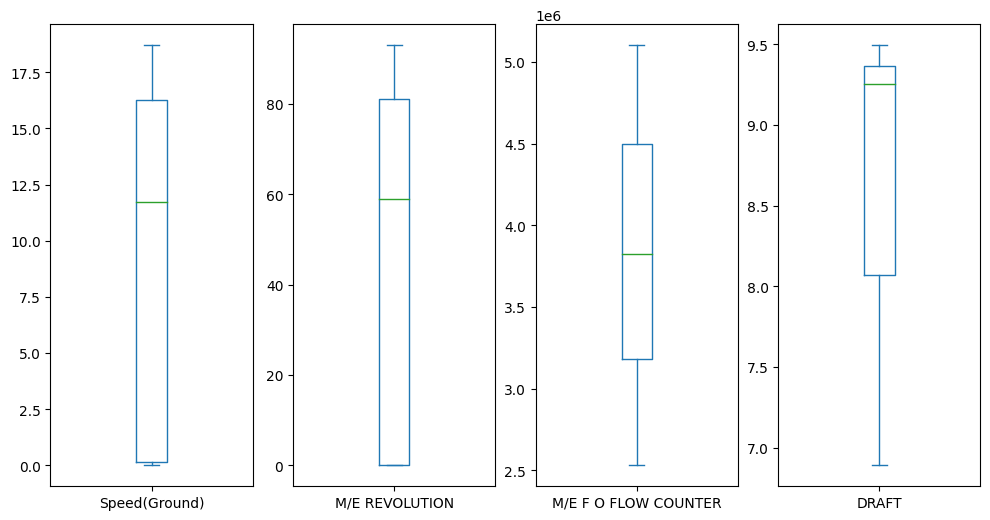

In [24]:
cols = ['Speed(Ground)', 'M/E REVOLUTION', 'M/E F O FLOW COUNTER', 'DRAFT']  # Reemplaza con tus columnas
df_joined[cols].plot(kind='box', subplots=True, layout=(1, len(cols)), figsize=(12, 6))
plt.show()

De la forma en que se unieron los dataframes se puede observar que no hay outlier presente. Esto puede representar algo bueno.

**Resumen estadistico básico:**

In [25]:
df_joined.describe()

,Latitude_degree,Longitude_degree,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT
count,91.000000,91.000000,91.000000,91.000000,9.100000e+01,91.000000
mean,32.133410,-4.250928,9.558242,47.538462,3.830950e+06,8.806429
std,12.373530,118.765902,7.102426,35.204895,7.667762e+05,0.727143
min,6.968611,-170.623889,0.000000,0.000000,2.531274e+06,6.890000
25%,29.892083,-81.233333,0.150000,0.000000,3.182112e+06,8.072500
50%,34.838333,-75.068333,11.700000,59.000000,3.826257e+06,9.255000
75%,38.842361,137.317222,16.250000,81.000000,4.500614e+06,9.365000
max,52.717222,173.655833,18.700000,93.000000,5.101872e+06,9.495000


**Histogramas**

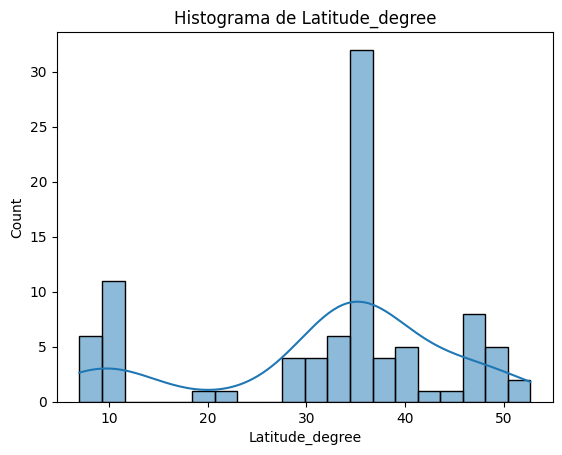

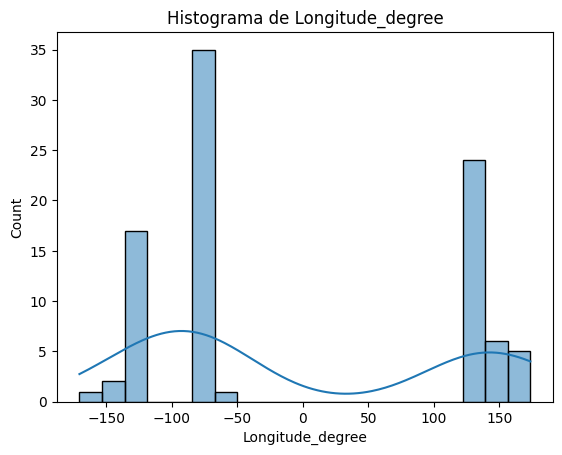

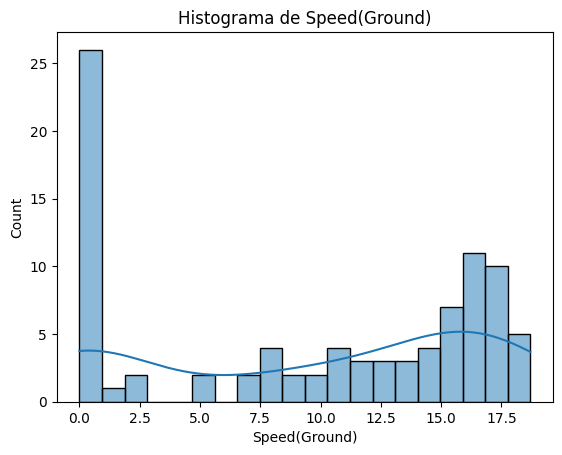

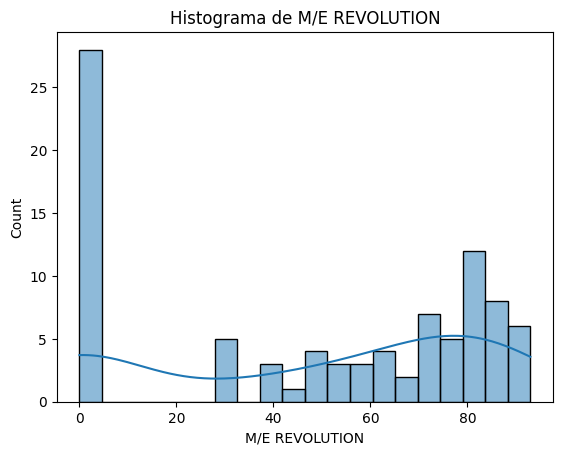

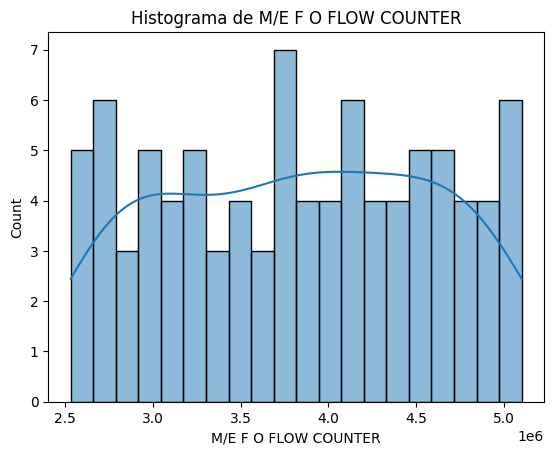

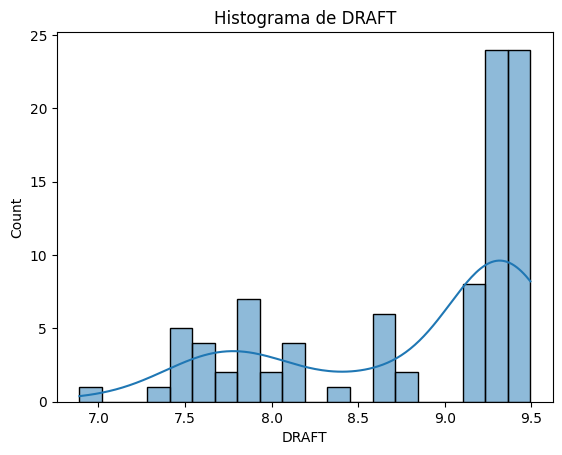

In [26]:
columnas_numericas = df_joined.select_dtypes(include=['float64', 'int64']).columns

# Se itera a traves de las columnas numericas
for columna in columnas_numericas:
    sns.histplot(df_joined[columna], bins=20, kde=True)
    plt.title(f'Histograma de {columna}')
    plt.show()

Analizando los histogramas:

Histograma de latitude_degree y longitude_degree no tiene mucha gracia analizarlos, ya que estos son posiciones terrestres, la verdad ningun histograma en este caso da una relación que le permita determinar a uno algo.

**Mapa de correlación entre variables**

<ipython-input-27-93e1214f32e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_joined.corr()


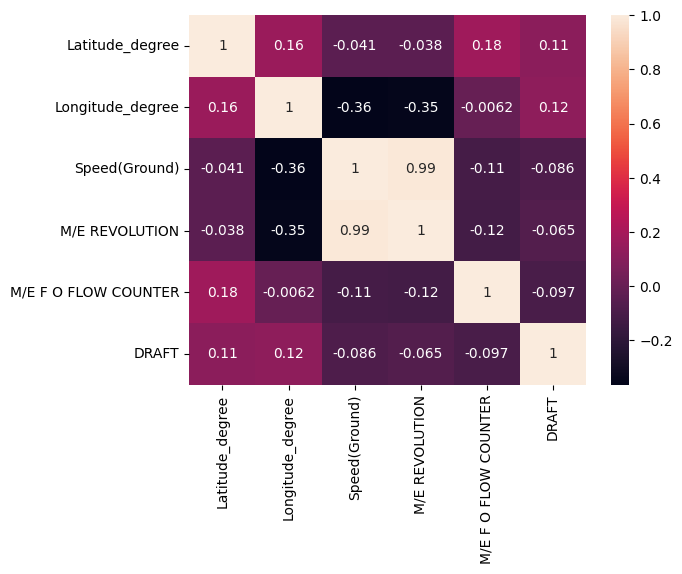

In [27]:
corr_matrix = df_joined.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Al hacer el mapa de correlación tampoco se tiene una información apreciable o una correlación que de cuenta del comportamiento de FLOW COUNTER. Por lo que se logra observar estos datos no representar la capacidad de realizar un modelo de machine learning en el cual uno pueda predecir algo, puede ser que al hacer el inner join y descartar tantos datos se haya perdido bastante información, entonces veamos la correlación del df_train.

<ipython-input-28-66381feb80d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix1 = df_train.corr()


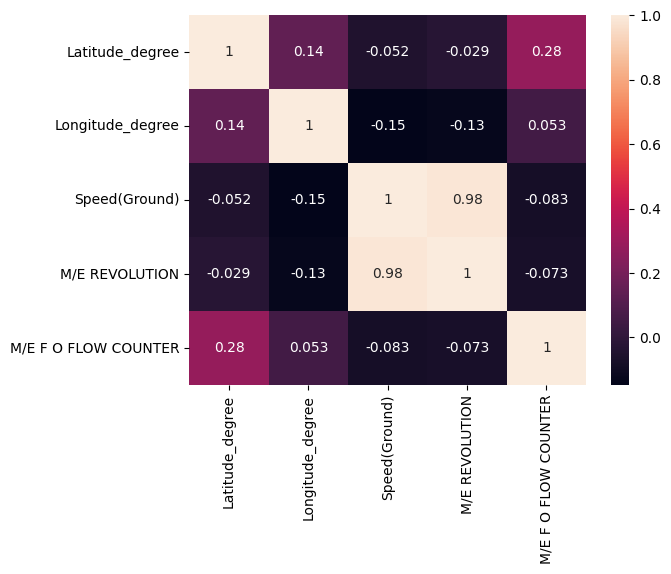

In [28]:
corr_matrix1 = df_train.corr()
sns.heatmap(corr_matrix1, annot=True)
plt.show()

En el dataframe original tampoco existe algo que le permita determinar a una persona con que esta relacionado el flujo del combustible. Esto desmuestra que es un problema complicado.

**Análisis de series de tiempo**

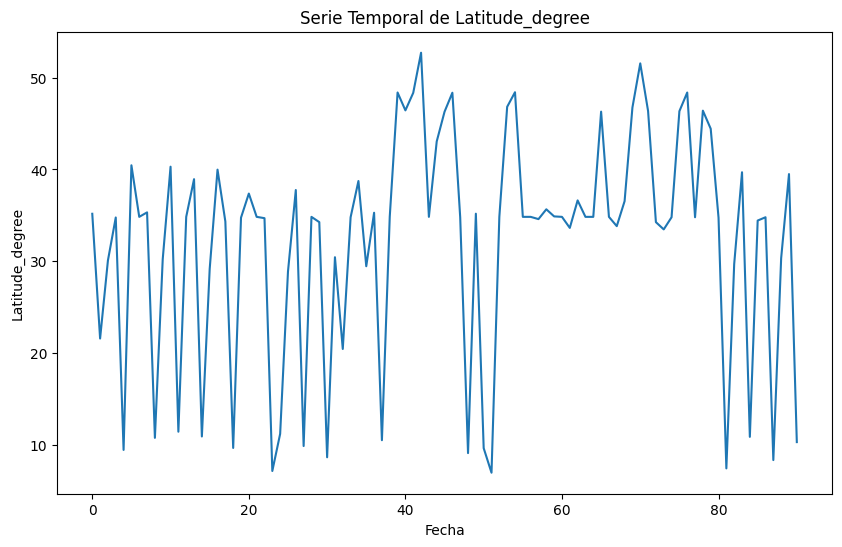

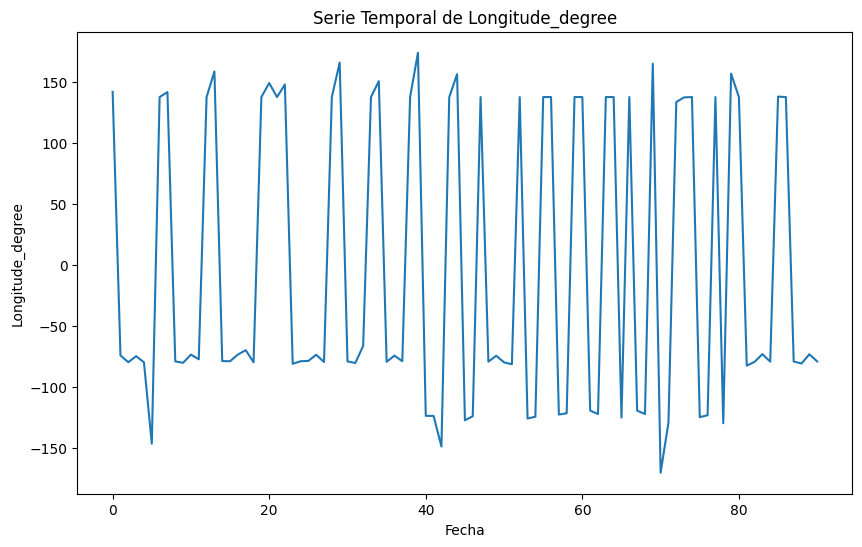

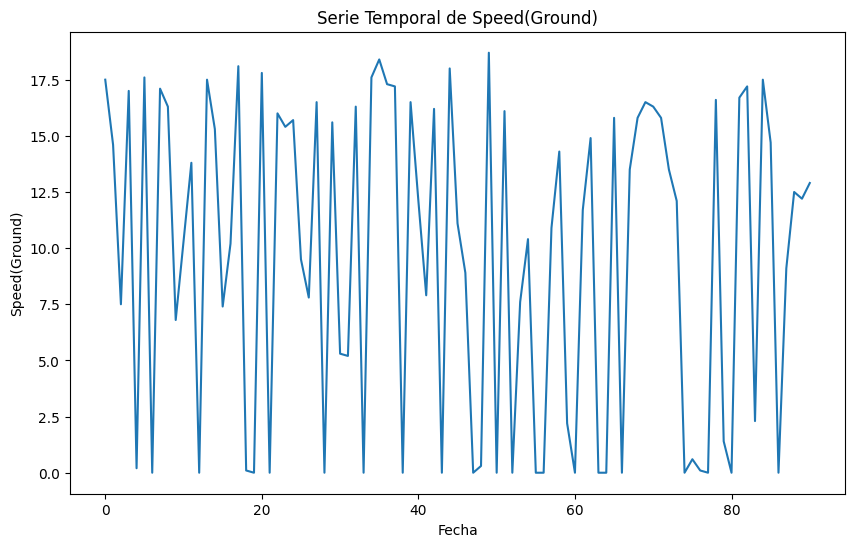

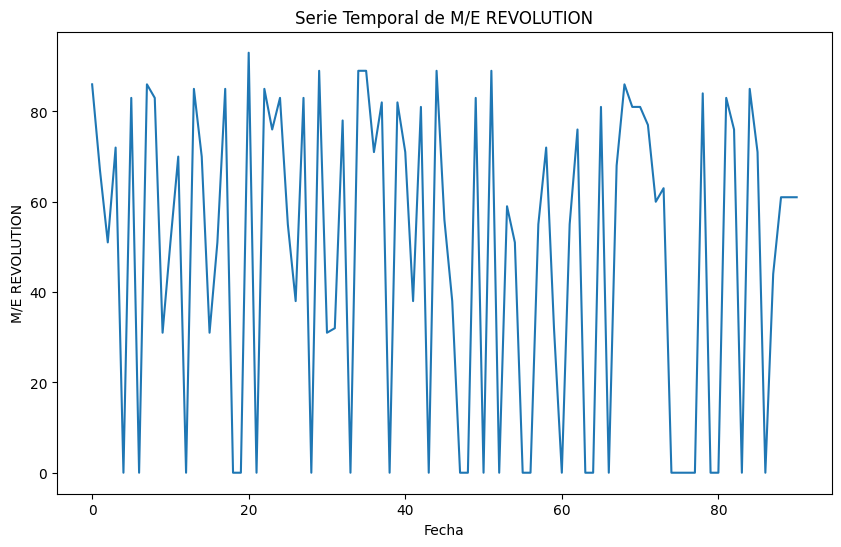

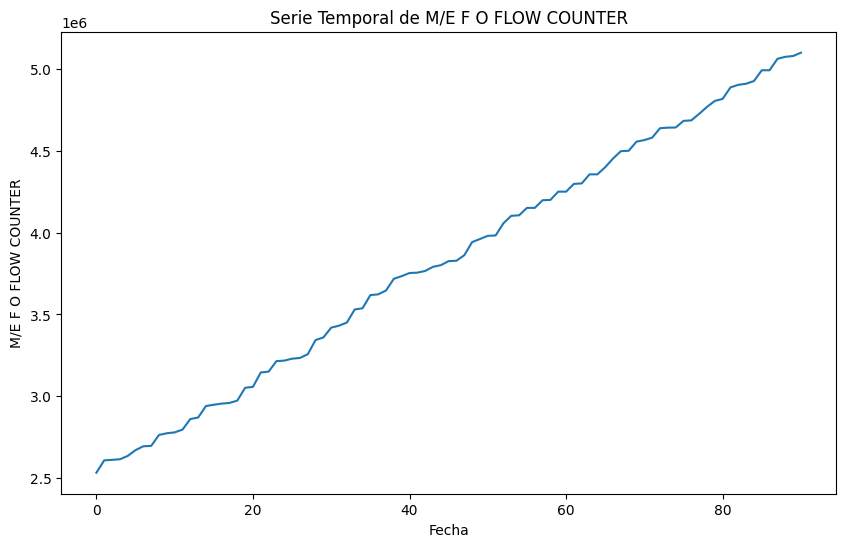

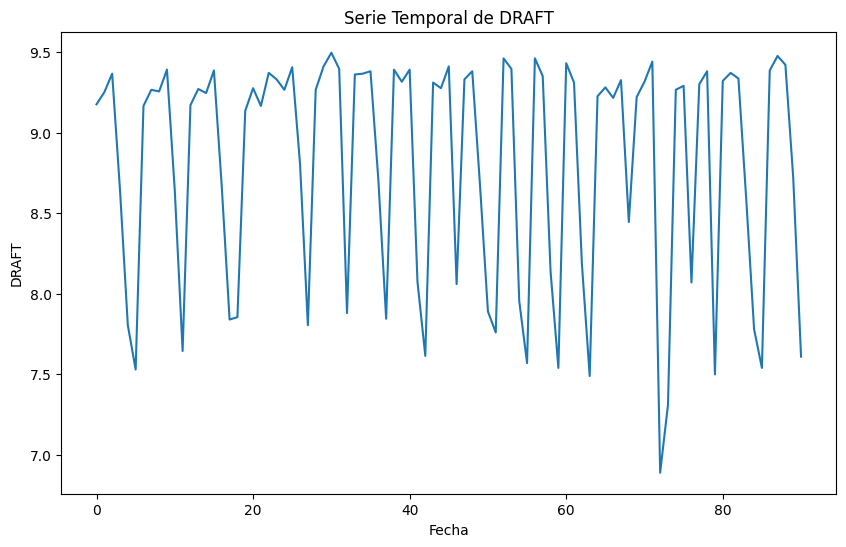

In [29]:
# Iterar a través de las columnas y graficar cada una
columnas_numericas = df_joined.select_dtypes(include=['float64', 'int64']).columns

for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus necesidades
    df_joined[columna].plot()
    plt.title(f'Serie Temporal de {columna}')
    plt.xlabel('Fecha')
    plt.ylabel(columna)
    plt.show()

La única información que se puede extraer es que el flujo de combustible en los barcos ha aumentado de manera linear a lo largo de los años.

In [30]:
import folium

# Esto no sirve para mucho, pero es una información interesante de donde se están tomando los datos.

# Crear un mapa centrado en la media de las coordenadas
mapa = folium.Map(location=[df_joined['Latitude_degree'].mean(), df_joined['Longitude_degree'].mean()], zoom_start=5)

# Añadir marcadores para cada punto
for idx, row in df_joined.iterrows():
    folium.Marker(
        location=[row['Latitude_degree'], row['Longitude_degree']],
        popup=f"Lat: {row['Latitude_degree']}, Lon: {row['Longitude_degree']}"
    ).add_to(mapa)

# Mostrar el mapa
mapa

In [31]:
df_joined.columns

Index(['Date', 'Latitude_degree', 'Longitude_degree', 'Beaufort',
       'Speed(Ground)', 'M/E REVOLUTION', 'M/E F O FLOW COUNTER', 'DRAFT'],
      dtype='object')

In [32]:
df_test.columns

Index(['Date', 'Latitude_degree', 'Longitude_degree', 'Beaufort',
       'Speed(Ground)', 'M/E REVOLUTION'],
      dtype='object')

In [33]:
# Seleccionando las características y la variable objetivo
X = df_joined[['Latitude_degree','Longitude_degree','Speed(Ground)', 'M/E REVOLUTION', 'DRAFT']]
y = df_joined['M/E F O FLOW COUNTER']

In [34]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Escalando las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Construyendo y entrenando el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# Prediciendo en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [38]:
# Evaluando el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(549586074203.69415, 0.030926342232833304)

Ahora apliquemos el modelo sobre el dataframe de test

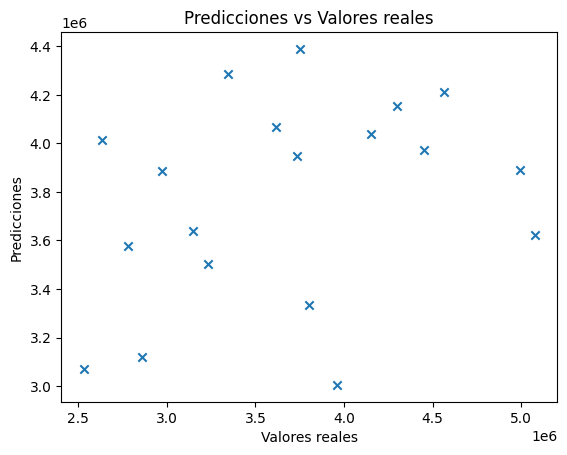

In [39]:
plt.scatter(y_test, y_pred,marker='x')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()

Este modelo se puede observar que no va a servir.

# Otro paradigma: left join

En este caso tomemos una forma diferente de unir los datasets

In [40]:
df_train # Anteriormente teníamos

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934
...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079


In [41]:
df_Vyg # Anteriormente teniamos

,vyg,Date,DRAFT
0,0,2016-06-03 01:00:00,9.175
1,1,2016-06-25 00:00:00,9.250
2,2,2016-06-27 00:00:00,9.365
3,3,2016-06-29 01:00:00,8.645
4,4,2016-07-06 00:00:00,7.805
...,...,...,...
88,88,2018-10-26 00:00:00,9.420
89,89,2018-10-29 00:00:00,8.720
90,90,2018-11-05 00:00:00,7.610
91,91,2018-11-28 00:00:00,9.460


In [42]:
df_joined2 = pd.merge(df_train, df_Vyg, on='Date',how='left')
df_joined2 = df_joined2.drop('vyg', axis=1)
df_joined2

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,9.175
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,NaN
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,NaN
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,NaN
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,NaN
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,NaN
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,NaN
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,NaN
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,NaN


El problema de hacer un left join es la gran cantidad de NaN que aparecen en los datos.

In [43]:
df_joined2.isna().sum()

Date                        0
Latitude_degree             0
Longitude_degree            0
Beaufort                    0
Speed(Ground)               0
M/E REVOLUTION              0
M/E F O FLOW COUNTER        0
DRAFT                   19909
dtype: int64

Como se puede observar en la variable DRAFT se tienen 19909 de datos NaN or Null. Se debe buscar una forma de llenar los NaN, una forma es con el promedio del DRAFT, otra forma es con el superior al dato. Claramente esto genera un sesgo en el modelo (por esto en principio se trato de hacer mediante inner join).

In [44]:
# Para df_prueba1, rellena con el valor anterior y crea un nuevo DataFrame
df_prueba1 = df_joined2.fillna(method='ffill')

# Para df_prueba2, calcula la media solo de las columnas numéricas y crea un nuevo DataFrame
df_prueba2 = df_joined2.fillna(df_joined2.mean(numeric_only=True))

In [45]:
df_prueba1

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,9.175
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,9.175
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,9.175
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,9.175
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,9.175
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,7.610
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,7.610
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,7.610
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,7.610


In [46]:
df_prueba2

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,DRAFT
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274,9.175000
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443,8.806429
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608,8.806429
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771,8.806429
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934,8.806429
...,...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079,8.806429
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079,8.806429
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079,8.806429
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079,8.806429


Al parecer los dataframes quedan con las mismas características entonces solo trabajamos con uno de ellos.

<ipython-input-47-cb2ae72b2a5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_prueba1.corr()


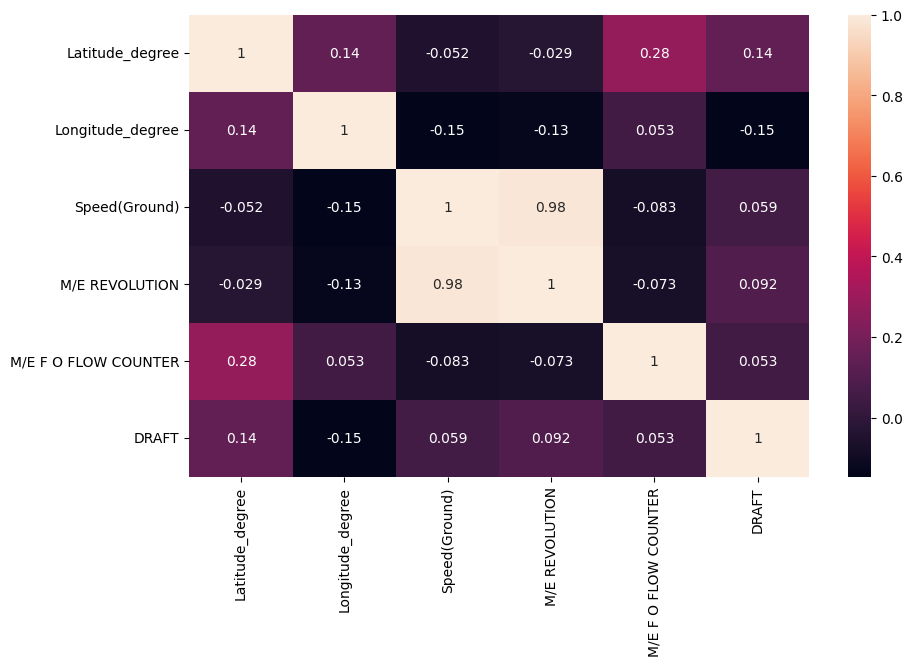

In [47]:
corr_matrix = df_prueba1.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)
plt.show()

Al coger más datos tampoco existe una correlación apreciable.

Antes de entrenar, organicemos el data_test

In [54]:
df_test

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0
...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92


In [58]:
df_test_joined = pd.merge(df_test, df_Vyg,on='Date',how='left')
df_test_joined = df_test_joined.drop('vyg', axis=1)


In [59]:
df_test_joined

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0,NaN
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0,NaN
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0,NaN
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0,NaN
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0,NaN
...,...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92,NaN
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91,NaN
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91,NaN
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92,NaN


In [63]:
# Para df_test, rellena con el valor anterior y crea un nuevo DataFrame
df_test_joined = df_test_joined.fillna(df_joined2.mean(numeric_only=True))

In [64]:
df_test_joined

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,DRAFT
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0,8.806429
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0,8.806429
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0,8.806429
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0,8.806429
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0,8.806429
...,...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92,8.175000
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91,8.175000
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91,8.175000
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92,8.175000


In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_prueba1[['Latitude_degree','Longitude_degree','Beaufort','Speed(Ground)', 'M/E REVOLUTION', 'DRAFT']], df_prueba1['M/E F O FLOW COUNTER'], test_size=0.2, random_state=42)


Me baso en un modelo pipeline con base a la charla. Algunas descripciones:

* Pipeline: Permite encadenar múltiples pasos de procesamiento y modelado. En este caso, los pasos son preprocesamiento y regresión.
* ColumnTransformer: Este componente se usa para aplicar diferentes transformaciones a columnas específicas en el DataFrame. Se pasan las columnas numéricas y se aplica un codificador one-hot a las columnas categóricas.
* OneHotEncoder: Transforma las variables categóricas en una forma que los modelos de machine learning puedan entender mejor.Es decir, a números.
* GridSearchCV: Realiza una búsqueda exhaustiva sobre un espacio de parámetros especificado. Esto es útil para encontrar la mejor combinación de parámetros para el modelo.

In [49]:
# Crear el pipeline
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', 'passthrough', ['Latitude_degree', 'Longitude_degree', 'Speed(Ground)', 'M/E REVOLUTION', 'DRAFT']),
            ('cat', OneHotEncoder(sparse=False, drop='first'), ['Beaufort'])
        ]
    )),
    ('regressor', RandomForestRegressor(n_estimators=500, random_state=72))  # Utilizando RandomForestRegressor
])

In [50]:
# Definir el espacio de parámetros para GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [10, 20, 30, None]
}

# Crear el GridSearchCV, el verbose me dice más o menos cuanto falta (indirectamente)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=3)

In [51]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['Latitude_degree',
                                                                          'Longitude_degree',
                                                                          'Speed(Ground)',
                                                                          'M/E '
                                                                          'REVOLUTION',
                                                                          'DRAFT']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Beaufort'])])),
                                       ('regressor',
                                        RandomForestRegressor(n_estimators=500,
                                                              random_state=72))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10, 20, 30, None],
                         'regressor__max_features': ['auto', 'sqrt'],
                         'regressor__n_estimators': [100, 200, 500]},
             verbose=3)

In [52]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# El modelo ya está entrenado con los mejores parámetros
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test) # Aplico los mejores parametros al X_test

Mejores parámetros encontrados: {'regressor__max_depth': None, 'regressor__max_features': 'auto', 'regressor__n_estimators': 500}


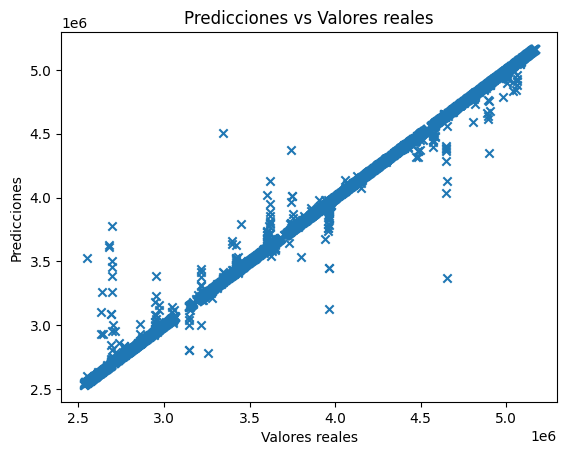

In [53]:

plt.scatter(y_test, y_pred, marker='x')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()

Este entrenamiento muestra algo más razonable. Ya que es una correlación lineal.

Ahora se evalúa con el df_test

In [65]:
pred = best_model.predict(df_test_joined[['Latitude_degree','Longitude_degree','Beaufort','Speed(Ground)', 'M/E REVOLUTION', 'DRAFT']])
pred =pd.DataFrame(pred,columns=['M/E F O FLOW COUNTER'])
prediccion = pd.concat([df_test_joined['Date'],pred],axis=1)
prediccion

,Date,M/E F O FLOW COUNTER
0,2018-11-27 10:00:00,3.085833e+06
1,2018-11-27 11:00:00,3.015198e+06
2,2018-11-27 12:00:00,3.079500e+06
3,2018-11-27 13:00:00,3.079500e+06
4,2018-11-27 14:00:00,3.079500e+06
...,...,...
4424,2019-06-02 19:00:00,4.312601e+06
4425,2019-06-02 20:00:00,4.312377e+06
4426,2019-06-02 21:00:00,4.312291e+06
4427,2019-06-02 22:00:00,4.311903e+06
